Mia Skaggs and George Tighe

# Heating Chicken Soup

The Question: When heating chicken soup, it can be difficult to not have weird temperature differences between the soup and the chunks of chicken. This makes for a gross meal. We wonder if it is possible to heat chicken soup on a stovetop so that the two reach the same temperature. Mathematically, the two will reach the same temperature after an infinite period of time as the temperatures will grow more and more slowly to approach the limiting value. Our question is then more accurately stated as how long it will take to heat chicken soup so that the two seem to be the same temperature, which we classified as within 2 degrees K.

Methodology: We are modeling the thermodynamic system of a pot on a flame heating broth and in turn the broth heating chicken. We chose to simplify the model by making the pot a constant temperature so as to not need to account for radiation of a flame and the heat transfer from the flame to a pot. It is reasonable to assume that we would start cooking with a pot already hot on a flame. We also modeled a chicken as a 3 inch radius sphere. This simplifies the geometry of the surface area in contact with water. We ignored the inconsistency of the material of a chicken in favor of treating it as a single object without multiple constants for bone or skin etc. We are looking for a 2K temperature difference as being 'the same temperature' in the context of human perception of taste. Finding exact numbers on human perception of temperature was difficult, but we found a paper on our perception of hot and cold taste in which test subjects successfully perceived a 2 degrees K difference, so we used this number.

Physics of the System: Our simplified model involves two flows, heat into the water from the pot, and heat from the pot into the chicken. We chose to use Newton's Law of Cooling rather than Fourier's Law to avoid using surface integrals in ModSimPy. Our heat flow equation is therefore dQ/dt = hA(T(t) - T(env)), where dQ/dt is the rate of heat flow, h is the heat transfer coefficient (the ratio of heat flux to temperature difference), and T(t) - T(env) is the temperature difference between the object we are considering and the environment. Integrating this equation with respect to time gives the change in thermal energy of the object over that time period. To convert this heat to a change in temperature, we used the equation Q = mcΔT, where Q is thermal energy, c is the specific heat of the object, and ΔT is the resultant change in temperature. Solving for ΔT, we find that the change in temperature is equal to Q/mc. We can calculate the temperature change of the broth due to the pot and the chicken as ΔT = (hA(T(t)-T(env))*dt)/mc of the broth - (hA(T(t)-T(env))*dt)/mc of the chicken. The temperature change of the chicken is then (hA(T(t)-T(env))*dt)/mc of the chicken. This model is a vast simplification of the true physics, so time permitting we will add flows to more accurately represent our system.

In [1]:
#Loading ModSimPy and libraries.

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
"""Defining our state and system. init is the initial state of our model. c_chicken and c_broth are 
    the specific heat capacities (J/g'C) of chicken and water, and Tbroth0 and Tchicken0 are the 
    initial temperatures (K) of the broth and chicken. Tpot is the temperature (°K) of the pot, assumed
    to be a constant. t0 and tf are the initial and final times (s) of the model, respectively.
    Vchicken and Vbroth are the volumes (m^3) of the chicken and broth. The chicken is modeled as a 
    3 in. radius sphere and 64 fl.oz. of broth was used. hbroth and hchicken are the heat transfer 
    coefficients (W/m^2K) of broth and chicken. This variable varies with heat flux density, so we
    approximated an average over our operating range of temperatures.
"""
c_chicken = 3.22
c_broth = 4.186
Tchicken0 = 300
Tbroth0 = 300
Tpot = 422
Vchicken = 0.014
Vbroth = 0.0019
hbroth = 100
hchicken = 50
mchicken = 4.48
mbroth = 1.89
potA = 0.065
chickenA = 0.073
dt = 0.05
init = State(Tbroth = Tbroth0, Tchicken = Tchicken0)
system = System(c_broth = c_broth, c_chicken = c_chicken, Vbroth = Vbroth, Vchicken = Vchicken,
               Tpot = Tpot, t0 = 0, tf = 60)

,values
c_broth,4.1860
c_chicken,3.2200
Vbroth,0.0019
Vchicken,0.0140
Tpot,422.0000
t0,0.0000
tf,60.0000


In [3]:
"""Defining the update function that will change the temperatures of the chicken and the broth. The
    heat flow into and out of the broth is dQb/dt (python does not like variable names to have slashes)
    and the heat flow into the chicken is dQc/dt. The changes in temperature of each state variable are
    deltaTb and deltaTc for the broth and chicken respectively. The function returns the temperatures
    of the previous state added to the calculated changes in temperature.
    
"""
def update_the_func(system, t, state):
    unpack(system)
    unpack(state)
    dQbdt = hbroth * potA * (Tpot - Tbroth)
    dQcdt = hchicken * chickenA * (Tbroth - Tchicken)
    deltaTb = (dQbdt*dt)/(c_broth*mbroth) - (dQcdt*dt)/(c_broth*mbroth)
    deltaTc = (dQcdt*dt)/(c_chicken*mchicken)
    return State(Tbroth = Tbroth + deltaTb, Tchicken = Tchicken + deltaTc)

In [4]:
"""Defining the function that runs our simulation. The function takes a state, system, and update
    function as parameters. Each state is recorded as a row in the TimeFrame results. For each time
    step in the range of t0 to tf, the result's next row is calculated as the return value when
    the previous state is passed through the update function. The runsimulation function returns
    the TimeFrame upon completion. The time at which the difference between the two temperatures
    is approximately 2°K is recorded and printed.
"""
def runsimulation(state, system, update_the_func):
    unpack(system)
    time = 0
    results = TimeFrame(columns = init.index)
    results.row[t0] = init
    for t in linrange(t0, tf, dt):
        if 2.05 > (results.row[t].Tbroth - results.row[t].Tchicken) > 1.95:
            time = t
        results.row[t+dt] = update_the_func(results.row[t], t, system)
    print(time)
    print(results.row[time].Tbroth)
    return results

In [5]:
"""Running the simulation. The resultant TimeFrame is assigned to the variable data.
"""
data = runsimulation(init, system, update_the_func)

24.750000000000217
420.6583005145078


,Tbroth,Tchicken
0.00,300,300
0.05,305.012,300
0.10,309.702,300.063
0.15,314.093,300.185
0.20,318.205,300.361
0.25,322.057,300.587
0.30,325.667,300.859
0.35,329.052,301.172
0.40,332.227,301.525
0.45,335.207,301.914


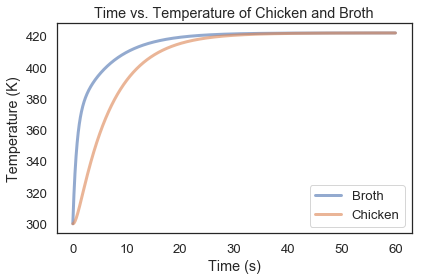

In [6]:
"""Plotting the temperatures (in kelvin) of the broth and the chicken over time. The curves show the
    expected characteristics of a heating curve.
"""
plot(data.Tbroth, label = 'Broth')
plot(data.Tchicken, label = 'Chicken')
decorate(xlabel = "Time (s)", ylabel = "Temperature (K)", 
         title = "Time vs. Temperature of Chicken and Broth")

Intepretation of Results and Iteration: At face-value, our results show that after 25 seconds, the chicken and broth would be at the same temperature, 420.65°K or 147.5°C. Obviously, this is extremely rapid heating. Our model so far fails to account for the reality that thermodynamic systems are complicated and we have not learned thermodynamics. The reliability of this result is not fantastically high. 

The Other Physics of the System: Hot liquids lose thermal energy to the environment through evaporation, which we did not include in our first model. The rate of heat loss due to evaporation varies with exposed surface area (a constant in our case), and the temperature of the liquid. We were able to find the heat loss rate of water for discrete temperatures, which we will implement as an interpolation of this data. This rate will be subtracted from the thermal energy of the broth as an additional flow.

In [7]:
"""This function takes the current temperature of the broth as a parameter, T. Using discrete points 
    for the rate of heat loss due to surface radiation and evaporation, we interpolated a function I(T)
    that outputs the approximate heat loss rate of the broth for a given temperature. A is the surface
    area of water open to the air.
"""
def evap(T):
    A = 0.018
    q = TimeSeries()
    q[305] = 410
    q[310] = 725
    q[316] = 1040
    q[322] = 1482
    q[327] = 1939
    q[333] = 2585
    q[338] = 3279
    q[344] = 4130
    q[350] = 5091
    q[355] = 6305
    q[361] = 7724
    q[366] = 9458
    q[372] = 11349
    q = q * A
    I = interpolate(q)
    return I(T)

In [8]:
"""This updated update function factors in the heat loss of the broth due to radiation and surface
    area evaporation. In all other aspects it functions in the same way as the original function.
"""
def update_the_func_again(system, t, state):
    unpack(system)
    unpack(state)
    dQbdt = (hbroth * potA * (Tpot - Tbroth)) - evap(Tbroth)
    dQcdt = hchicken * chickenA * (Tbroth - Tchicken)
    deltaTb = (dQbdt*dt)/(c_broth*mbroth) - (dQcdt*dt)/(c_broth*mbroth)
    deltaTc = (dQcdt*dt)/(c_chicken*mchicken)
    return State(Tbroth = Tbroth + deltaTb, Tchicken = Tchicken + deltaTc)

In [9]:
"""Runs the simulation with the new update function.
"""
def runsimulation(state, system, update_the_func_again):
    unpack(system)
    time = 0
    results = TimeFrame(columns = init.index)
    results.row[t0] = init
    for t in linrange(t0, tf, dt):
        if 2.05 > (results.row[t].Tbroth - results.row[t].Tchicken) > 1.95:
            time = t
        results.row[t+dt] = update_the_func_again(results.row[t], t, system)
    print(time)
    print(results.row[time].Tbroth)
    return results

In [10]:
data = runsimulation(init, system, update_the_func_again)

18.75000000000013
381.2492536945836


,Tbroth,Tchicken
0.00,300,300
0.05,305.001,300
0.10,309.645,300.063
0.15,313.96,300.184
0.20,317.974,300.359
0.25,321.706,300.582
0.30,325.173,300.849
0.35,328.388,301.157
0.40,331.367,301.501
0.45,334.127,301.879


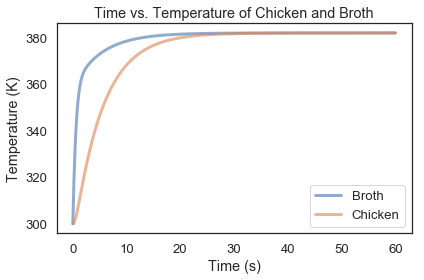

In [11]:
"""Plotting the second set of data.
"""
plot(data.Tbroth, label = 'Broth')
plot(data.Tchicken, label = 'Chicken')
decorate(xlabel = "Time (s)", ylabel = "Temperature (K)", 
         title = "Time vs. Temperature of Chicken and Broth")

More Results: The second model gave a time for both to reach 381°K in 19 seconds. The heating rate was lower for both chicken and broth because of the additional heat loss of the broth due to the environment, and the time needed for the two to reach the same temperature decreased.

Interpretation II: Return of the Bad Results
Our results with the addition of heat loss from surface evaporation were worse than before. Our chicken and broth now reach the same temperature of 381°K in 19 seconds. The physical model is closer to reality, but still not accounting for other factors. We are not accounting for uneven heating of the pot by the flame, varying temperatures within the broth, convection currents, imprecise temperatures in our model, and the effects of each of these on the heat flows. We were unable to find a published work of a similar model to compare our model to. The closest we were able to find was a model of a chicken patty being cooked in a convection oven that reached 80°C in about seven minutes.